   Channel  Counts
0        0       0
1        1       0
2        2       0
3        3       0
4        4       0


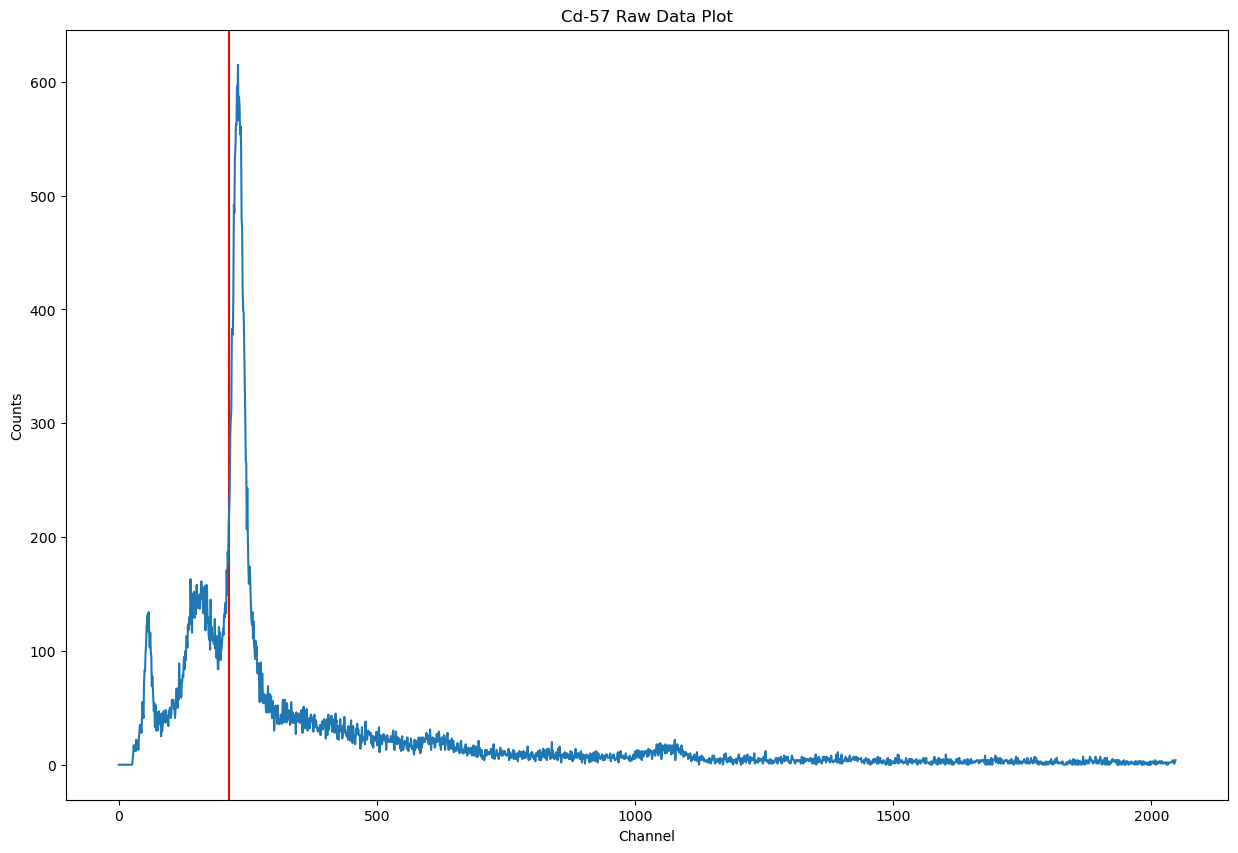

In [6]:
###################
# Import Libraries
###################

import pandas as pd # coding but excel
import numpy as np # number stuff, creates arrays
import matplotlib.pyplot as plt # plotting
from scipy.optimize import curve_fit # curve fit class


##############
# Import data
##############

df_Co_57 = pd.read_csv("Co_57.csv") # create pandas dataframe
print(df_Co_57.head()) # print first 5 rows


##############
# Plot data
##############

x_Co_57 = df_Co_57["Channel"] # grab column
y_Co_57 = df_Co_57["Counts"] # grab column
plt.figure(figsize=(15,10))
plt.axvline(x=213.5, c='r') # Compton peak
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Cd-57 Raw Data Plot")
plt.plot(x_Co_57, y_Co_57)
plt.show()

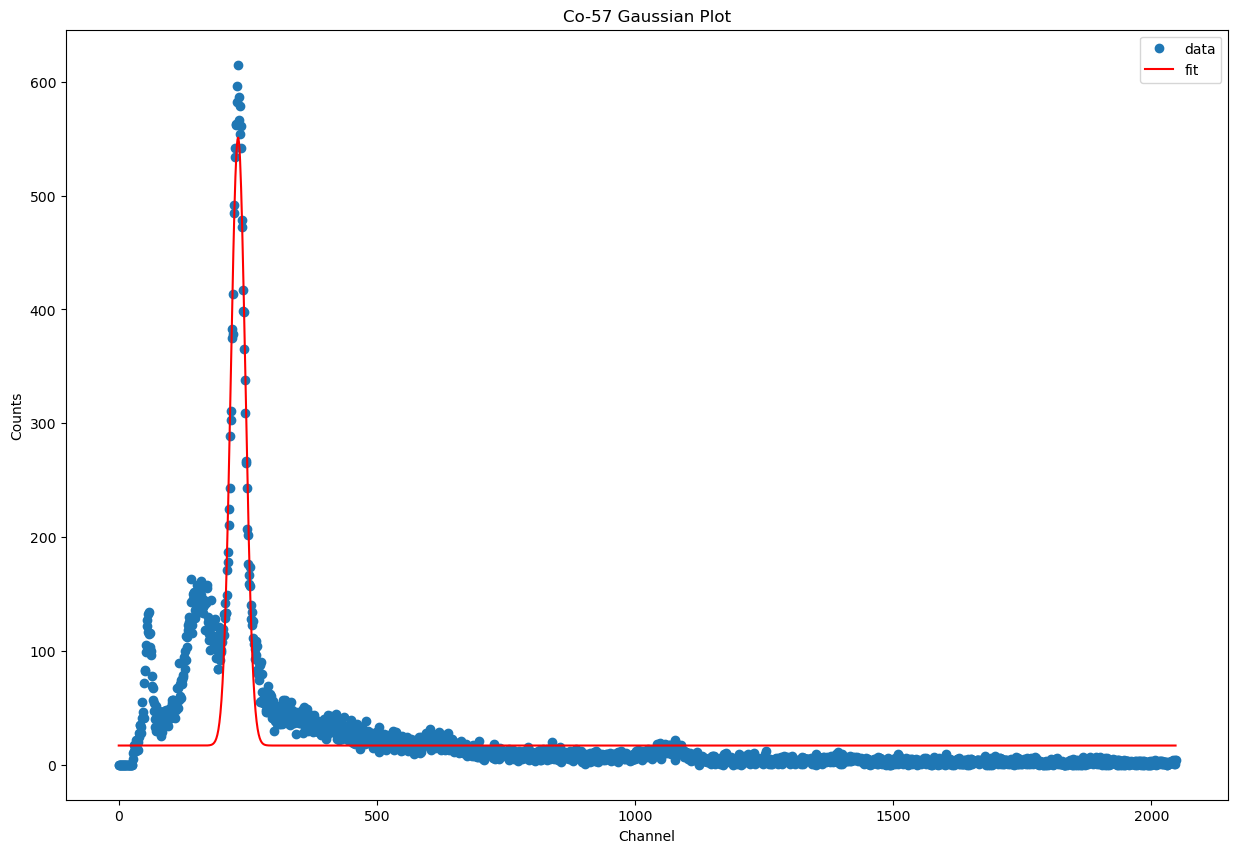

In [3]:
########################
# Input constant values
########################

a_Co_57 = 600 # amplitude                   
mean_Co_57 = 250 # middle of graph                 
h_Co_57 = 50 # vertical shift                  
sigma_Co_57 = 25 # width displacement


################################
# Define the Gaussian function
# takes in constants, solves 
# equation, returns value
################################

def gaus(x_Co_57, a_Co_57, mean_Co_57, sigma_Co_57, h_Co_57):
    fit = a_Co_57*np.exp((-(x_Co_57-mean_Co_57)**2)/(2*sigma_Co_57**2)) + h_Co_57
    return fit


#####################
# Fit the data using
# curve fit class
#####################

popt_Co_57, pcov_Co_57 = curve_fit(gaus, x_Co_57, y_Co_57, p0=[a_Co_57, mean_Co_57, sigma_Co_57, h_Co_57]) # solves for a, mean, sigma, h
y_Co_57_fit = gaus(x_Co_57, *popt_Co_57) # creates y(x) = gaus function with fitted values


#################
# Plot Fit Curve
#################

plt.figure(figsize=(15,10))
plt.plot(x_Co_57, y_Co_57, 'o', label="data")
plt.plot(x_Co_57, y_Co_57_fit, 'r-', label='fit')
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Co-57 Gaussian Plot")
plt.legend()
plt.show()

In [4]:
#####################
# Print fit data
# Print uncertainty
#####################
print("Fit Amplitude: ", popt_Co_57[0],
      "\n Fit Mean: ", popt_Co_57[1],
      "\n Fit Sigma (distance from mean to sides): ", popt_Co_57[2],
      "\n Fit Height: ", popt_Co_57[3])

print("\n Uncertainty matrix (uncertainties lie along diagonal): \n", pcov_Co_57)

Fit Amplitude:  534.0923453529641 
 Fit Mean:  231.13450500906077 
 Fit Sigma (distance from mean to sides):  14.118739841358199 
 Fit Height:  16.859492593039246

 Uncertainty matrix (uncertainties lie along diagonal): 
 [[ 4.48877132e+01  1.93161319e-07 -7.77802557e-01 -2.67282141e-01]
 [ 1.93161319e-07  4.16536660e-02 -5.12027545e-09 -3.77214024e-12]
 [-7.77802557e-01 -5.12027545e-09  4.21820318e-02 -1.41321989e-02]
 [-2.67282141e-01 -3.77214024e-12 -1.41321989e-02  3.77994082e-01]]
